In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',117)

## What this script does:

   

In [16]:
# read in data to panda
# get the number of unclassified reads from Kraken2 outputs

## from trimmed reads
InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromTrimmedReads/Reads_and_Coverage_fromPython.pkl"
##### alternatives: 
#   InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Coverage_fromThomas.txt"
## from mapping
#   InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromMapping/out/Coverage_collect.pkl"

## get the genetic diversity
## ## ## from single samples
#InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_singleData_20240527.pkl"
InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_threshold0.6_singleData_20240527.pkl"
## ## ## from subsampling
InPi_change1="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overview_sub35_20240527.pkl"
InPi_change2="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overview_sub50_20240527.pkl"
InPi_change3="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overview_sub100_20240527.pkl"

## here, I looked at how pi changes for different pool size and coverage
#InPi_change1="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_maxCov500_Pool100.pkl"
#InPi_change2="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_maxCov500_Pool1000.pkl"
#InPi_change3="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_maxCov800_Pool500.pkl"


In [17]:

## get all the data
df_PiDefault = pd.read_pickle(InPi_default)
df_change1 = pd.read_pickle(InPi_change1)
df_change2 = pd.read_pickle(InPi_change2)
df_change3 = pd.read_pickle(InPi_change3)

#df_cov=pd.read_csv(InCov,delimiter="\t", na_values="na")
df_cov=pd.read_pickle(InCov)

df_cov = df_cov.reset_index()
df_cov.rename(columns={'index': 'ID'}, inplace=True)
df_cov = df_cov[["ID","institution","treatment","replicate","week","coverage"]]

## for the one from mapping
#df_cov.rename(columns={'sample': 'ID', 'mean': 'coverage'}, inplace=True)
#df_cov = df_cov[['ID','coverage']]


In [18]:

## merge the data frames
df_merge_all = pd.merge(df_PiDefault, df_cov, on="ID", how="outer")
df_merge_all_butnotall = pd.merge(df_merge_all, df_change1, on="ID", how="inner")
df_merge_change1 = pd.merge(df_change1, df_cov, on="ID", how="outer")
df_merge_change2 = pd.merge(df_change2, df_cov, on="ID", how="outer")
df_merge_change3 = pd.merge(df_change3, df_cov, on="ID", how="outer")

df_merge_change1


,ID,institution_x,treatment_x,inst_treat,week_x,rep,pi_mean,pi_std,piNorm_mean,piNorm_std,piNormwNaN_mean,piNormwNaN_std,NumNaNWindows,institution_y,treatment_y,replicate,week_y,coverage
0,Gent_bb_15_1,Gent,bb,Gent_bb,15.0,1,0.001662,0.003720,0.001341,0.002728,0.001336,0.002719,35.0,Gent,bb,1,15,111.064662
1,Gent_bb_15_2,Gent,bb,Gent_bb,15.0,2,0.001706,0.003559,0.001493,0.002930,0.001492,0.002928,5.0,Gent,bb,2,15,123.782224
2,Gent_bb_15_3,Gent,bb,Gent_bb,15.0,3,0.001735,0.003674,0.001473,0.002854,0.001472,0.002852,5.0,Gent,bb,3,15,103.134254
3,Gent_bb_15_4,Gent,bb,Gent_bb,15.0,4,0.001722,0.003612,0.001475,0.002894,0.001474,0.002892,6.0,Gent,bb,4,15,112.559776
4,Gent_bb_15_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gent,bb,5,15,108.856907
5,Gent_bb_1_1,Gent,bb,Gent_bb,1.0,1,0.001609,0.003298,0.001501,0.002936,0.001497,0.002927,30.0,Gent,bb,1,1,277.081712
6,Gent_bb_1_2,Gent,bb,Gent_bb,1.0,2,0.001718,0.003598,0.001554,0.003008,0.001554,0.003007,4.0,Gent,bb,2,1,150.633462
7,Gent_bb_1_3,Gent,bb,Gent_bb,1.0,3,0.001701,0.003469,0.001596,0.003093,0.001595,0.003091,4.0,Gent,bb,3,1,210.354344
8,Gent_bb_1_4,Gent,bb,Gent_bb,1.0,4,0.001713,0.003458,0.001616,0.003122,0.001615,0.003121,4.0,Gent,bb,4,1,228.824043
9,Gent_iso_15_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gent,iso,1,15,138.829437


<Axes: xlabel='coverage', ylabel='pi_mean'>

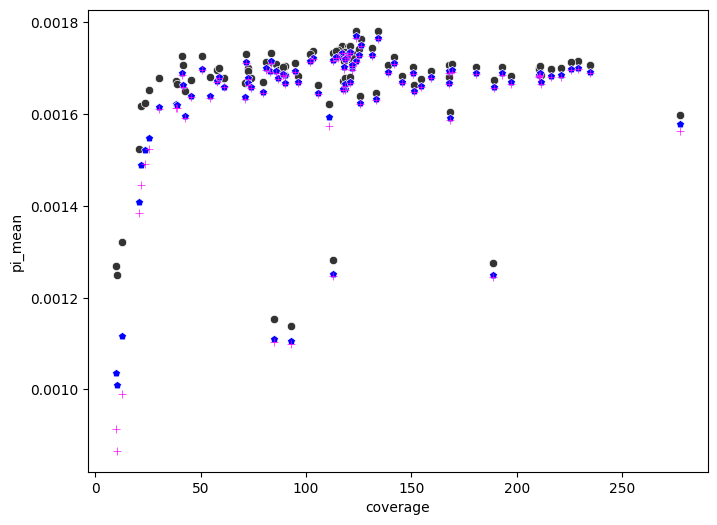

In [19]:
## hypothesis: different treatments start out with different diversity from the start:

fig1, ax1 = plt.subplots(figsize=(8,6))
sns.scatterplot(df_merge_all, x="coverage",y="pi_mean", ax=ax1, color=".2")
sns.scatterplot(df_merge_all, x="coverage",y="piNorm_mean", ax=ax1, color="blue", marker="p")
sns.scatterplot(df_merge_all, x="coverage",y="piNormwNaN_mean", ax=ax1, color="magenta", marker="+")

#sns.scatterplot(df_merge_change1, x="coverage",y="piNormwNaN_mean", ax=ax1, color=".2")


#sns.despine(offset=5, trim=True)


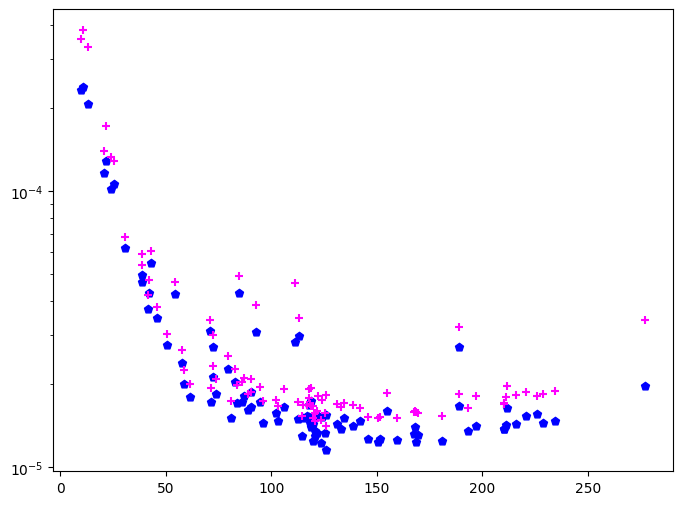

In [20]:
## now get how strong the values differ from each other:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.scatter(df_merge_all["coverage"].values, df_merge_all["pi_mean"].values - df_merge_all["piNorm_mean"].values, color="blue", marker="p")
plt.scatter(df_merge_all["coverage"].values, df_merge_all["pi_mean"].values - df_merge_all["piNormwNaN_mean"].values, color="magenta", marker="+")
#sns.scatterplot(df_merge_all, x="coverage",y="piNormwNaN_mean", ax=ax1, color="magenta", marker="+")
ax2.set_yscale('log')


<Axes: xlabel='coverage', ylabel='piNormwNaN_mean'>

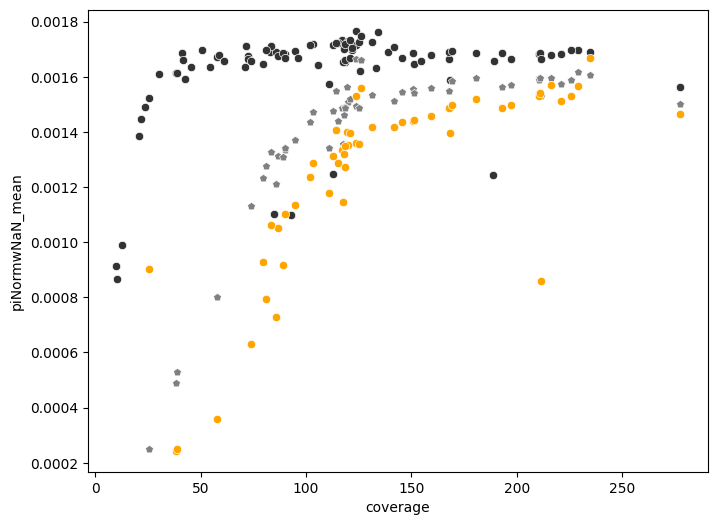

In [21]:
## hypothesis: different treatments start out with different diversity from the start:

fig3, ax3 = plt.subplots(figsize=(8,6))
sns.scatterplot(df_merge_all, x="coverage",y="piNormwNaN_mean", ax=ax3, color=".2")
sns.scatterplot(df_merge_change1, x="coverage",y="piNorm_mean", ax=ax3, color="gray", marker="p")
sns.scatterplot(df_merge_change2, x="coverage",y="piNorm_mean", ax=ax3, color="orange", marker="o")
#sns.scatterplot(df_merge_change3, x="coverage",y="piNorm_mean", ax=ax3, color="magenta", marker="+")


#sns.scatterplot(df_merge_change1, x="coverage",y="piNormwNaN_mean", ax=ax1, color=".2")
#sns.despine(offset=5, trim=True)


In [8]:
df_merge_all["coverage"].values

array([111.06466152, 123.78222383, 103.13425424, 112.55977567,
       108.85690678, 277.08171236, 150.63346211, 210.35434397,
       228.82404287, 138.82943719,  82.85464158,  71.57611017,
        41.44419093,  21.78950399, 167.99135593, 118.66604686,
       188.92418495,  42.84544816,  72.26942871,  72.29570937,
        71.10917946,  23.91000299,  54.30509372,  84.69530309,
       112.91239681,  92.67281306, 188.69326271,  20.76309272,
        10.49199153,   9.92699252,  12.9351341 ,  79.47267547,
        38.51143071, 141.82534995,  86.00228016, 117.66260967,
        25.55864656, 102.09893868, 117.00575922, 113.99457129,
       115.11475723, 125.24698355, 220.66390977, 225.79278514,
       193.12214357, 210.25585543, 123.47622981, 125.87181057,
       119.89444816, 118.03421635, 131.29597208, 114.40093968,
       119.50858026, 118.40032253,  90.16470837, 120.78647557,
        38.79682104,  94.54670638,  86.87142024,  83.48220837,
       159.37554885, 215.93839681, 167.64014207, 180.74